In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv("C://Users//Honey.Sharma//OneDrive//Desktop//Leads.csv")

In [3]:
df.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Get_updates_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14,20,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13,17,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15,18,No,No,Modified


In [4]:
df.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Search', 'Magazine',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates_About_Our_Courses', 'Tags', 'Lead_Quality',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'Lead_Profile', 'City', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score',
       'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

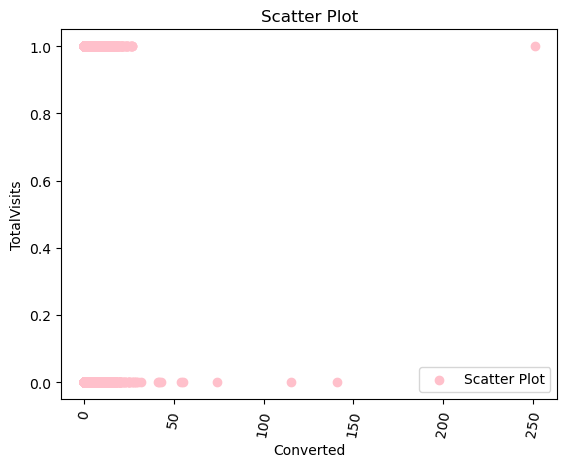

In [5]:

plt.scatter(df['TotalVisits'], df['Converted'], color='pink', label='Scatter Plot')
plt.xlabel('Converted')
plt.ylabel('TotalVisits')
plt.title('Scatter Plot')
plt.legend()
plt.xticks(rotation=80)  # Rotate x-axis labels for better visibility if needed
plt.show()

In [6]:
df.shape

(9240, 37)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test =train_test_split(df[['TotalVisits']],df.Converted,test_size=0.1)

In [9]:
x_train

,TotalVisits
7756,4
3192,2
6051,14
2298,0
5710,3
...,...
3494,10
4100,1
4558,3
8923,0


In [10]:
x_test

,TotalVisits
6017,3
2687,0
6606,3
6573,4
2018,1
...,...
3247,1
4023,10
7880,3
7826,1


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
x_train.shape

(8316, 1)

In [13]:
y_train.shape

(8316,)

In [14]:
lr = LogisticRegression().fit(x_train, y_train)
lr.predict(x_train).shape

(8316,)

In [15]:
lr.predict_proba(x_train)

array([[0.61221332, 0.38778668],
       [0.61689859, 0.38310141],
       [0.58849022, 0.41150978],
       ...,
       [0.61455861, 0.38544139],
       [0.62156226, 0.37843774],
       [0.61221332, 0.38778668]])

In [16]:
from copy import deepcopy

In [17]:
predictions_df = deepcopy((df[['Converted', 'TotalVisits']]))

In [18]:
predictions_df1 = lr.predict_proba(x_train)[:,1]
predictions_df2 = (lr.predict_proba(x_train)[:,1] > 0.5).astype(int)

In [19]:
predictions_df

,Converted,TotalVisits
0,0,0
1,0,5
2,1,2
3,0,1
4,1,2
...,...,...
9235,1,8
9236,0,2
9237,0,2
9238,1,3


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
df.isnull().sum()

Prospect_ID                                      0
Lead_Number                                      0
Lead_Origin                                      0
Lead_Source                                      0
Do_Not_Email                                     0
Do_Not_Call                                      0
Converted                                        0
TotalVisits                                      0
Total_Time_Spent_on_Website                      0
Page_Views_Per_Visit                             0
Last_Activity                                    0
Country                                          0
Specialization                                   0
How_did_you_hear_about_X_Education               0
What_is_your_current_occupation                  0
What_matters_most_to_you_in_choosing_a_course    0
Search                                           0
Magazine                                         0
Newspaper_Article                                0
X_Education_Forums             

In [22]:
scaler = StandardScaler()

In [23]:
x_train_scaled = scaler.fit_transform(x_train)

In [24]:
x_test_scaled = scaler.transform(x_test)

In [25]:
x_train_scaled

array([[ 0.12574681],
       [-0.28233533],
       [ 2.1661575 ],
       ...,
       [-0.07829426],
       [-0.69041747],
       [ 0.12574681]])

In [26]:
log_reg = LogisticRegression(random_state = 0).fit(x_train_scaled, y_train)

In [27]:
log_reg.predict(x_train_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
log_reg.score(x_train_scaled, y_train)

0.6132756132756133

In [29]:
log_reg.score(x_test_scaled, y_test)

0.6222943722943723

In [30]:
from math import exp

In [31]:
plt.rcParams["figure.figsize"]= (10,6)

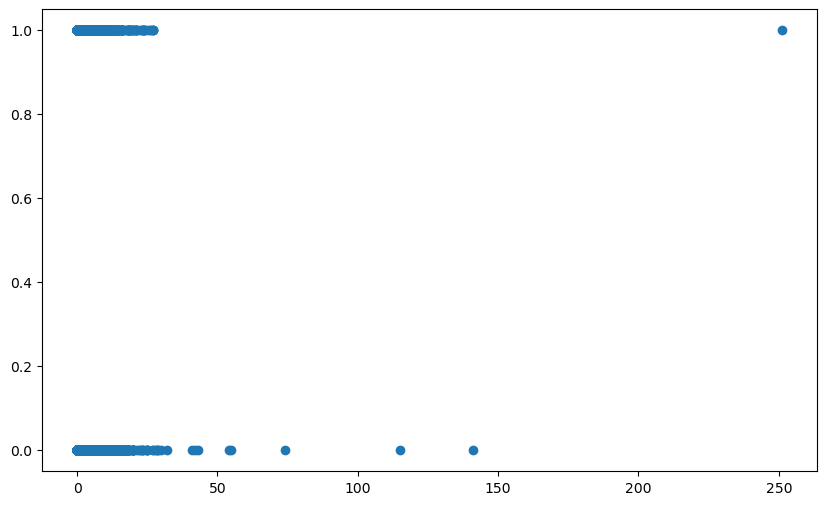

In [32]:
plt.scatter(df['TotalVisits'], df['Converted'])
plt.show()

In [33]:
x_train, x_test, y_train, y_test =train_test_split(df[['TotalVisits']],df.Converted,test_size=0.1)

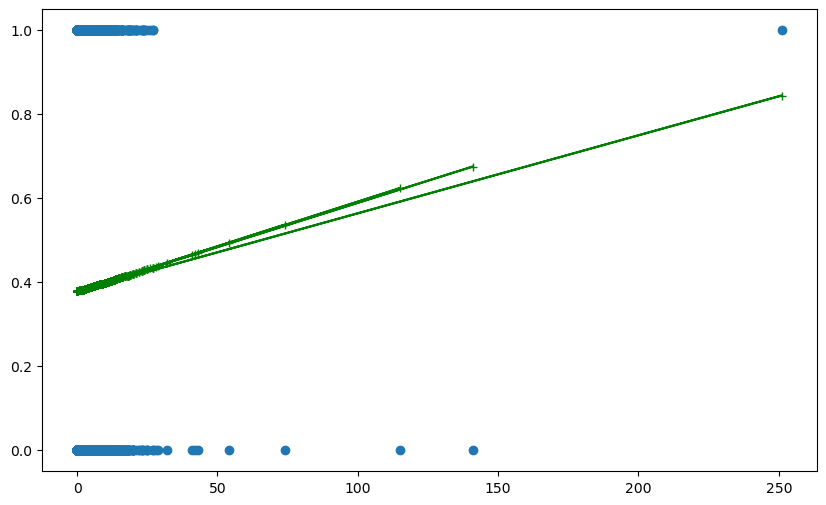

In [34]:
# Assuming you have already imported and initialized your logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Assuming x_train and y_train are your training data
model.fit(x_train, y_train)

# Now that the model is fitted, you can use the predict_proba method
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict_proba(x_train)[:, 1], color="green", marker="+")


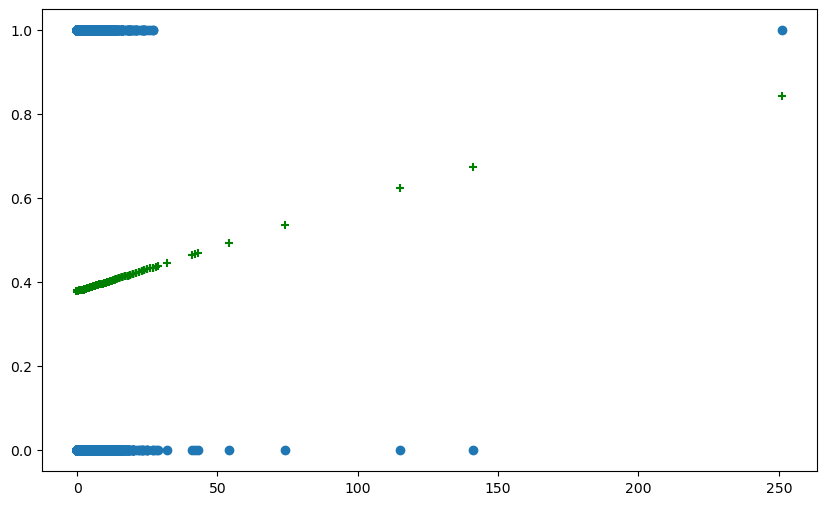

In [35]:
plt.scatter(x_train, y_train)  # Scatter plot of training data
probabilities = model.predict_proba(x_train)[:, 1]  # Predict probabilities for class 1

plt.scatter(x_train, probabilities, color="green", marker="+")  # Scatter plot of predicted probabilities
plt.show()  # Display the plot
